In [50]:
#https://www.kaggle.com/code/residentmario/gradient-descent-with-linear-regression/notebook
#https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-linear-regression-dd04fba8e137

import numpy as np
import matplotlib.pyplot as plt
#to import the dataset
from sklearn import datasets
#split the data set
from sklearn.model_selection import train_test_split
#to create the combination
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor

In [51]:
iris = datasets.load_iris()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.10, random_state=0)
X_train.shape, y_train.shape, X_test.shape

((135, 4), (135,), (15, 4))

In [53]:
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


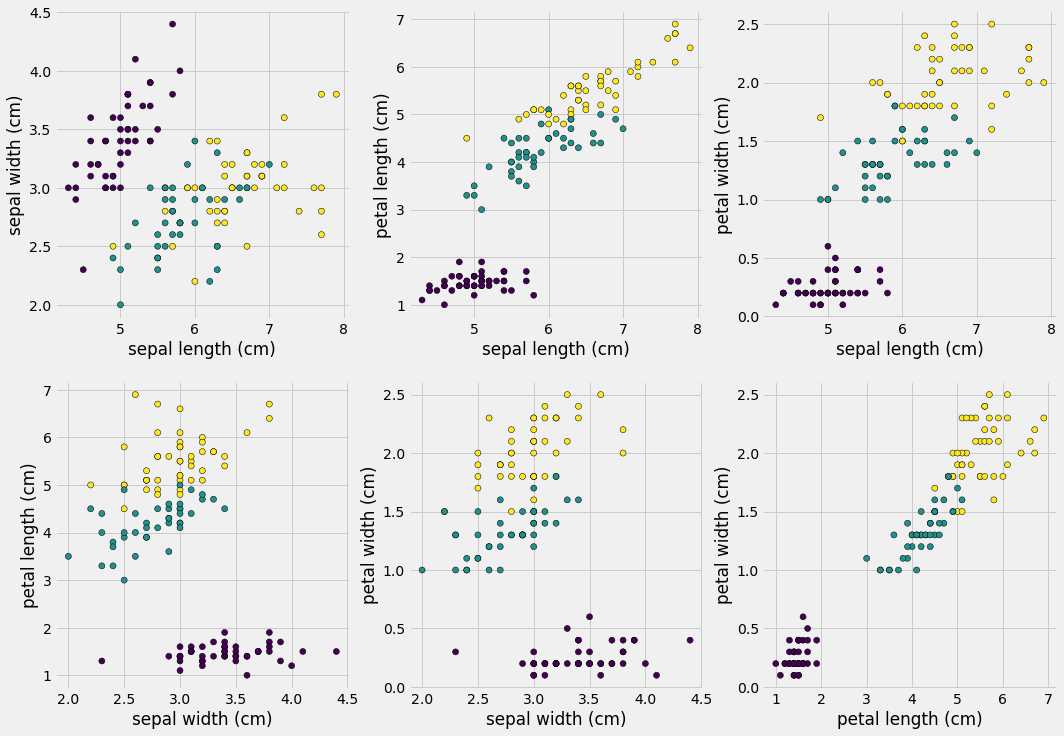

In [55]:
features_combinations = list(combinations(list(range(4)), 2))
features_combinations

fig = plt.figure(figsize = [16,18])
for i, features in enumerate(features_combinations):
    plt.style.use('fivethirtyeight')
    ax = fig.add_subplot(3, 3,i+1)
    ax.scatter(X_train[:, features[0]], X_train[:, features[1]], c=y_train, edgecolor='k')
    ax.set_xlabel(feature_names[features[0]])
    ax.set_ylabel(feature_names[features[1]])

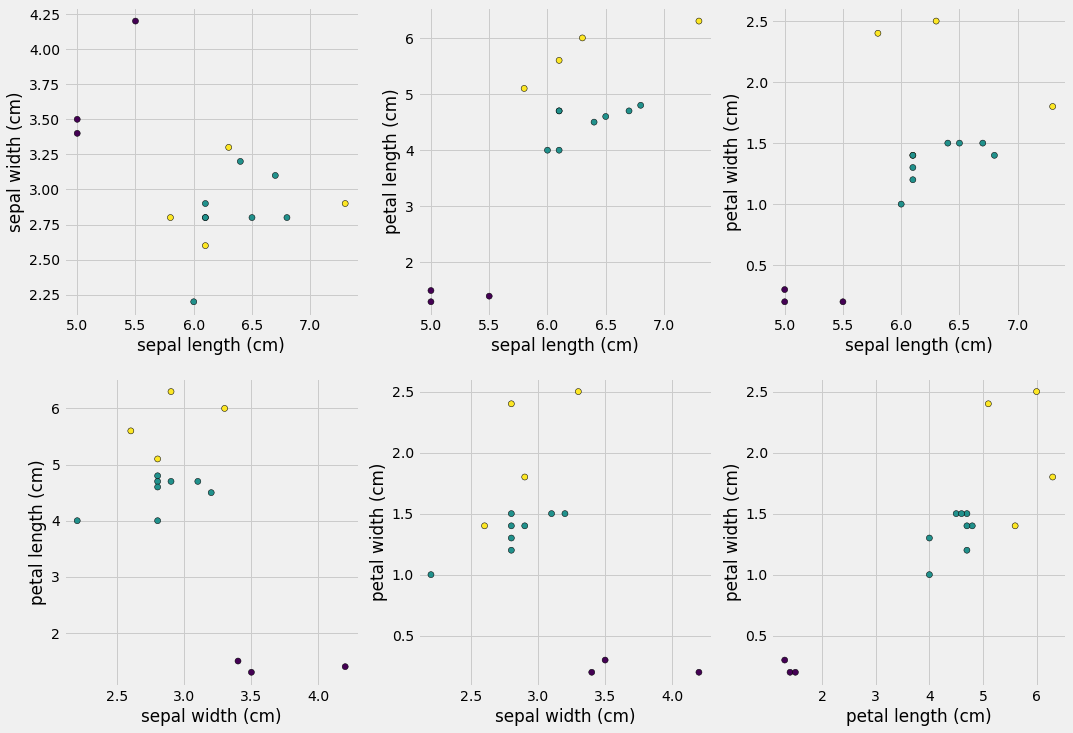

In [56]:
fig = plt.figure(figsize = [16,18])
for i, features in enumerate(features_combinations):
    plt.style.use('fivethirtyeight')
    ax = fig.add_subplot(3, 3,i+1)
    ax.scatter(X_test[:, features[0]], X_test[:, features[1]], c=y_test, edgecolor='k')
    ax.set_xlabel(feature_names[features[0]])
    ax.set_ylabel(feature_names[features[1]])

In [62]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, iterations=100):
        self.learning_rate, self.iterations = learning_rate, iterations
        self.w = 0.2
        self.b = 0.1
        
        
    
    def fit(self, X, y):
        self.w = 0.2
        self.b = 0.1
        n = X.shape[0]
        batch_size = 32
        steps = []
        loss =[]
        for _ in range(self.iterations):
            for i in range(0,len(X)+1, batch_size):
                end = i+batch_size
                x_batch = X[i:end]
                y_batch = y[i:end]
                #prediction
                y_pred = (self.w*x_batch) + self.b 
                #calculating the current cost
                c_loss = np.sum((y_batch-y_pred)**2)/len(y_batch)
                loss.append(c_loss)
                steps.append(_+1)
                #calculating Gradient
                w_gradient = -2 * np.sum(x_batch*(y_batch - (self.w*x_batch + self.b))) / len(x_batch)
                b_gradient = -2 * np.sum(y_batch - (self.w*x_batch + self.b)) / len(x_batch)
                #update weight and bias
                self.w = self.w - (self.learning_rate * w_gradient)
                self.b = self.b - (self.learning_rate * b_gradient)
                print("Step no: " , _+1)
                print("batch_size:" , batch_size)
                print("LOSS IS :" , c_loss)
                print("weight:",self.w)
                print("Bias:",self.b)
        #self.w, self.b = w, b
        
       
        plt.plot(steps, loss)
        plt.style.use('fivethirtyeight')
        #plt.figure(figsize = (8,6))
        plt.ylabel("Loss")
        plt.xlabel("Steps")
        #plt.scatter(steps, loss, color='red')
        #plt.title("Steps vs loss")
        #plt.ylabel("Loss")
        #plt.xlabel("Steps")

        
    def predict(self,x,y):
        y_pred = x*self.w + self.b
        y_test = y

        return np.sum((y_test-y_pred)**2)/len(y_test)

        
       

Step no:  1
batch_size: 32
LOSS IS : 3.7348624999999993
weight: 0.220480125
Bias: 0.10374375000000001
Step no:  1
batch_size: 32
LOSS IS : 2.6493611463820708
weight: 0.23854018453101564
Bias: 0.10686023702890626
Step no:  1
batch_size: 32
LOSS IS : 2.8183629785943545
weight: 0.2568342036838646
Bias: 0.11008598690967539
Step no:  1
batch_size: 32
LOSS IS : 2.217134880609135
weight: 0.2731531022155791
Bias: 0.1128723971401464
Step no:  1
batch_size: 32
LOSS IS : 2.7266796749599442
weight: 0.2910916472957368
Bias: 0.11607556412346565
Step no:  2
batch_size: 32
LOSS IS : 2.0844741848248143
weight: 0.30570994147006325
Bias: 0.11877661503303164
Step no:  2
batch_size: 32
LOSS IS : 1.3345822328221872
weight: 0.3175852864763819
Bias: 0.12085998792928976
Step no:  2
batch_size: 32
LOSS IS : 1.5567711507248703
weight: 0.3302371520581611
Bias: 0.12313883899814324
Step no:  2
batch_size: 32
LOSS IS : 1.1947577799992954
weight: 0.34094601034546196
Bias: 0.12501326169124502
Step no:  2
batch_size: 3

LOSS IS : 0.3617030695757356
weight: 0.48774171277122264
Bias: 0.20739405541134667
Step no:  90
batch_size: 32
LOSS IS : 0.37709806699095333
weight: 0.48907733031635403
Bias: 0.20773088267446824
Step no:  90
batch_size: 32
LOSS IS : 0.35663617912788104
weight: 0.4869803421502105
Bias: 0.2074783420779587
Step no:  90
batch_size: 32
LOSS IS : 0.3888482453717752
weight: 0.48688280410570167
Bias: 0.20761473891630658
Step no:  90
batch_size: 32
LOSS IS : 0.43711660361861004
weight: 0.4849362111311763
Bias: 0.20742969259642327
Step no:  90
batch_size: 32
LOSS IS : 0.36161088357502
weight: 0.487634564002648
Bias: 0.20802941754719215
Step no:  91
batch_size: 32
LOSS IS : 0.3770271760819467
weight: 0.4889698183455961
Bias: 0.20836616276769337
Step no:  91
batch_size: 32
LOSS IS : 0.35657116897095503
weight: 0.4868729321784792
Bias: 0.20811361689250327
Step no:  91
batch_size: 32
LOSS IS : 0.3887511295499704
weight: 0.4867754547234917
Bias: 0.20824999182214343
Step no:  91
batch_size: 32
LOSS IS

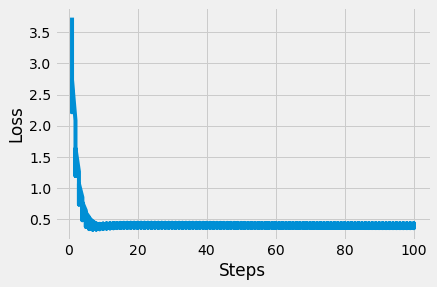

In [63]:
#model1
clf = LinearRegression()
clf.fit(X_train[:, 0], X_train[:, 1])
predict = clf.predict(X_test[:, 0], X_test[:, 1])
print("The Test Loss:",predict)


Step no:  1
batch_size: 32
LOSS IS : 6.931175
Step no:  1
batch_size: 32
LOSS IS : 8.664208592123265
Step no:  1
batch_size: 32
LOSS IS : 7.17192875978518
Step no:  1
batch_size: 32
LOSS IS : 6.811336112570418
Step no:  1
batch_size: 32
LOSS IS : 4.993033167345617
Step no:  2
batch_size: 32
LOSS IS : 4.1025356378914895
Step no:  2
batch_size: 32
LOSS IS : 5.191021029610803
Step no:  2
batch_size: 32
LOSS IS : 4.604140359295069
Step no:  2
batch_size: 32
LOSS IS : 4.27690934201631
Step no:  2
batch_size: 32
LOSS IS : 3.5872628005327543
Step no:  3
batch_size: 32
LOSS IS : 2.789543084882525
Step no:  3
batch_size: 32
LOSS IS : 3.4218813604830496
Step no:  3
batch_size: 32
LOSS IS : 3.3643896902711052
Step no:  3
batch_size: 32
LOSS IS : 3.018594114086114
Step no:  3
batch_size: 32
LOSS IS : 2.9966523876687994
Step no:  4
batch_size: 32
LOSS IS : 2.1906948001684166
Step no:  4
batch_size: 32
LOSS IS : 2.50235624537793
Step no:  4
batch_size: 32
LOSS IS : 2.764572117611384
Step no:  4
batc

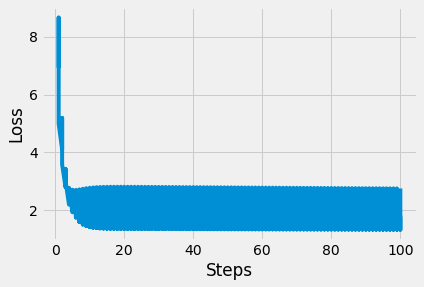

In [35]:
#model2
clf1 = LinearRegression()
clf1.fit(X_train[:, 0], X_train[:, 2])
predict1 = clf1.predict(X_test[:, 0], X_test[:, 2])
print("The Test Loss:",predict1)

Step no:  1
batch_size: 32
LOSS IS : 0.3891125
Step no:  1
batch_size: 32
LOSS IS : 0.29677775785471294
Step no:  1
batch_size: 32
LOSS IS : 0.5357319603201658
Step no:  1
batch_size: 32
LOSS IS : 0.3924935948942781
Step no:  1
batch_size: 32
LOSS IS : 0.5335744865878331
Step no:  2
batch_size: 32
LOSS IS : 0.3862288359712912
Step no:  2
batch_size: 32
LOSS IS : 0.3000127354535482
Step no:  2
batch_size: 32
LOSS IS : 0.5361602367372713
Step no:  2
batch_size: 32
LOSS IS : 0.39334678195802336
Step no:  2
batch_size: 32
LOSS IS : 0.5250803149597496
Step no:  3
batch_size: 32
LOSS IS : 0.38459120006597447
Step no:  3
batch_size: 32
LOSS IS : 0.30261537132361027
Step no:  3
batch_size: 32
LOSS IS : 0.5367353396932607
Step no:  3
batch_size: 32
LOSS IS : 0.3942077773012131
Step no:  3
batch_size: 32
LOSS IS : 0.5193747778822975
Step no:  4
batch_size: 32
LOSS IS : 0.38361663550411773
Step no:  4
batch_size: 32
LOSS IS : 0.30458205441042074
Step no:  4
batch_size: 32
LOSS IS : 0.537245045959

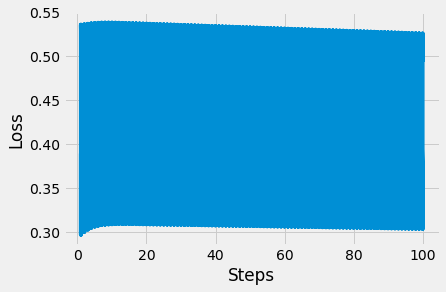

In [36]:
#model3
clf2 = LinearRegression()
clf2.fit(X_train[:, 0], X_train[:, 3])
predict2 = clf2.predict(X_test[:, 0], X_test[:, 3])
print("The Test Loss:",predict2)

Step no:  1
batch_size: 32
LOSS IS : 9.8120875
Step no:  1
batch_size: 32
LOSS IS : 13.268454091203406
Step no:  1
batch_size: 32
LOSS IS : 11.78788352095482
Step no:  1
batch_size: 32
LOSS IS : 12.555862954500327
Step no:  1
batch_size: 32
LOSS IS : 9.164340499481158
Step no:  2
batch_size: 32
LOSS IS : 8.475840594061111
Step no:  2
batch_size: 32
LOSS IS : 11.634034103622831
Step no:  2
batch_size: 32
LOSS IS : 10.385696651518451
Step no:  2
batch_size: 32
LOSS IS : 11.074046680055952
Step no:  2
batch_size: 32
LOSS IS : 8.070594526773322
Step no:  3
batch_size: 32
LOSS IS : 7.4155371203731955
Step no:  3
batch_size: 32
LOSS IS : 10.291227445263685
Step no:  3
batch_size: 32
LOSS IS : 9.256694909720583
Step no:  3
batch_size: 32
LOSS IS : 9.864748609466414
Step no:  3
batch_size: 32
LOSS IS : 7.219031114518309
Step no:  4
batch_size: 32
LOSS IS : 6.575740288341311
Step no:  4
batch_size: 32
LOSS IS : 9.185919430303878
Step no:  4
batch_size: 32
LOSS IS : 8.347593294155924
Step no:  4

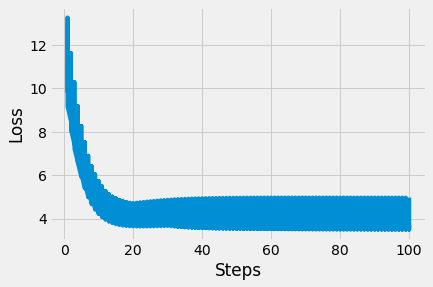

In [37]:
#model4
clf3 = LinearRegression()
clf3.fit(X_train[:, 1], X_train[:, 2])
predict3 = clf3.predict(X_test[:, 1], X_test[:, 2])
print("The Test Loss:",predict3)

Step no:  1
batch_size: 32
LOSS IS : 0.7104
Step no:  1
batch_size: 32
LOSS IS : 0.8543797815129479
Step no:  1
batch_size: 32
LOSS IS : 1.0218649589960853
Step no:  1
batch_size: 32
LOSS IS : 0.9072762098708547
Step no:  1
batch_size: 32
LOSS IS : 0.624868347225701
Step no:  2
batch_size: 32
LOSS IS : 0.6900609962828737
Step no:  2
batch_size: 32
LOSS IS : 0.8156844093369877
Step no:  2
batch_size: 32
LOSS IS : 0.9939668888663046
Step no:  2
batch_size: 32
LOSS IS : 0.8745359026945931
Step no:  2
batch_size: 32
LOSS IS : 0.6228514023265992
Step no:  3
batch_size: 32
LOSS IS : 0.6742152942893943
Step no:  3
batch_size: 32
LOSS IS : 0.7831115694914231
Step no:  3
batch_size: 32
LOSS IS : 0.9711769078275687
Step no:  3
batch_size: 32
LOSS IS : 0.8472463703296764
Step no:  3
batch_size: 32
LOSS IS : 0.6232924763021623
Step no:  4
batch_size: 32
LOSS IS : 0.6619304372815021
Step no:  4
batch_size: 32
LOSS IS : 0.7556120673615874
Step no:  4
batch_size: 32
LOSS IS : 0.9525317664413384
Step 

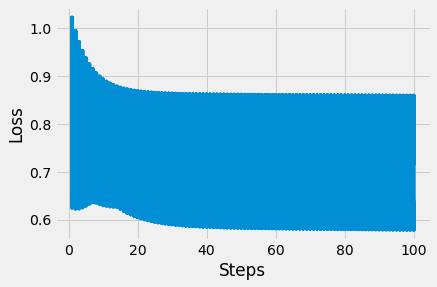

In [38]:
#model5
clf4 = LinearRegression()
clf4.fit(X_train[:, 1], X_train[:, 3])
predict4 = clf4.predict(X_test[:, 1], X_test[:, 3])
print("The Test Loss:",predict4)

Step no:  1
batch_size: 32
LOSS IS : 0.25258749999999996
Step no:  1
batch_size: 32
LOSS IS : 0.2867974833028325
Step no:  1
batch_size: 32
LOSS IS : 0.34637189609460844
Step no:  1
batch_size: 32
LOSS IS : 0.2846310581407752
Step no:  1
batch_size: 32
LOSS IS : 0.12167163205566586
Step no:  2
batch_size: 32
LOSS IS : 0.20071829555926327
Step no:  2
batch_size: 32
LOSS IS : 0.22188629102410323
Step no:  2
batch_size: 32
LOSS IS : 0.2824506057863517
Step no:  2
batch_size: 32
LOSS IS : 0.2281832570009245
Step no:  2
batch_size: 32
LOSS IS : 0.0987720147875647
Step no:  3
batch_size: 32
LOSS IS : 0.16400892854140234
Step no:  3
batch_size: 32
LOSS IS : 0.17592053198454266
Step no:  3
batch_size: 32
LOSS IS : 0.23598789524614575
Step no:  3
batch_size: 32
LOSS IS : 0.18809423485750054
Step no:  3
batch_size: 32
LOSS IS : 0.08476906692948905
Step no:  4
batch_size: 32
LOSS IS : 0.13798643067059674
Step no:  4
batch_size: 32
LOSS IS : 0.14332087678625116
Step no:  4
batch_size: 32
LOSS IS :

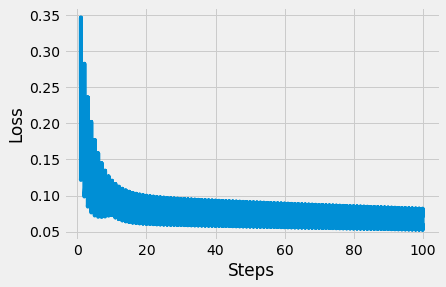

In [39]:
#model6
clf5 = LinearRegression()
clf5.fit(X_train[:, 2], X_train[:, 3])
predict5 = clf5.predict(X_test[:, 2], X_test[:, 3])
print("The Test Loss:",predict5)

Step no:  1
batch_size: 32
LOSS IS : 23.7942125
Step no:  1
batch_size: 32
LOSS IS : 26.59227436040476
Step no:  1
batch_size: 32
LOSS IS : 24.769730766141542
Step no:  1
batch_size: 32
LOSS IS : 25.976670747968
Step no:  1
batch_size: 32
LOSS IS : 21.26026891284268
Step no:  2
batch_size: 32
LOSS IS : 19.154473547292316
Step no:  2
batch_size: 32
LOSS IS : 21.93170508561029
Step no:  2
batch_size: 32
LOSS IS : 20.2119835416677
Step no:  2
batch_size: 32
LOSS IS : 21.46800853734091
Step no:  2
batch_size: 32
LOSS IS : 17.023226163943452
Step no:  3
batch_size: 32
LOSS IS : 15.443292747203756
Step no:  3
batch_size: 32
LOSS IS : 18.15286025997896
Step no:  3
batch_size: 32
LOSS IS : 16.543199891837606
Step no:  3
batch_size: 32
LOSS IS : 17.81442862095239
Step no:  3
batch_size: 32
LOSS IS : 13.644604992765293
Step no:  4
batch_size: 32
LOSS IS : 12.477033695269895
Step no:  4
batch_size: 32
LOSS IS : 15.086489076833777
Step no:  4
batch_size: 32
LOSS IS : 13.58990225492073
Step no:  4


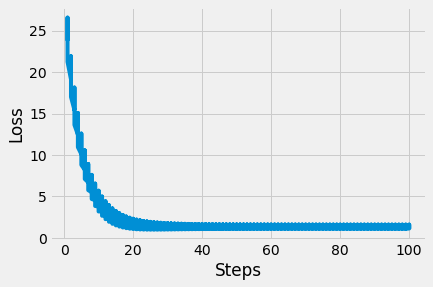

In [40]:
#model7
clf6 = LinearRegression()
clf6.fit(X_train[:, 1], X_train[:, 0])
predict6 = clf6.predict(X_test[:, 1], X_test[:, 0])
print("The Test Loss:",predict6)

Step no:  1
batch_size: 32
LOSS IS : 22.981775
Step no:  1
batch_size: 32
LOSS IS : 23.662564093744884
Step no:  1
batch_size: 32
LOSS IS : 22.38769724186602
Step no:  1
batch_size: 32
LOSS IS : 22.220803442964325
Step no:  1
batch_size: 32
LOSS IS : 20.155266642279354
Step no:  2
batch_size: 32
LOSS IS : 17.28738434555404
Step no:  2
batch_size: 32
LOSS IS : 17.0488804382606
Step no:  2
batch_size: 32
LOSS IS : 16.725428242103952
Step no:  2
batch_size: 32
LOSS IS : 16.407754544198
Step no:  2
batch_size: 32
LOSS IS : 15.793018429474605
Step no:  3
batch_size: 32
LOSS IS : 13.2544231106883
Step no:  3
batch_size: 32
LOSS IS : 12.425705626793444
Step no:  3
batch_size: 32
LOSS IS : 12.756044087983584
Step no:  3
batch_size: 32
LOSS IS : 12.322807059933028
Step no:  3
batch_size: 32
LOSS IS : 12.703339564797151
Step no:  4
batch_size: 32
LOSS IS : 10.393692739920105
Step no:  4
batch_size: 32
LOSS IS : 9.197118588219446
Step no:  4
batch_size: 32
LOSS IS : 9.97413306158043
Step no:  4
b

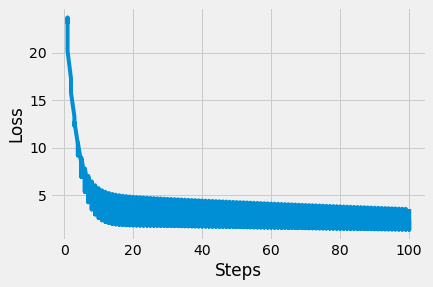

In [41]:
#model8
clf7 = LinearRegression()
clf7.fit(X_train[:, 2], X_train[:, 0])
predict7 = clf7.predict(X_test[:, 2], X_test[:, 0])
print("The Test Loss:",predict7)

Step no:  1
batch_size: 32
LOSS IS : 27.6772625
Step no:  1
batch_size: 32
LOSS IS : 30.683272429922873
Step no:  1
batch_size: 32
LOSS IS : 30.00020172168078
Step no:  1
batch_size: 32
LOSS IS : 31.83284857265031
Step no:  1
batch_size: 32
LOSS IS : 29.147848758038556
Step no:  2
batch_size: 32
LOSS IS : 26.354038496823886
Step no:  2
batch_size: 32
LOSS IS : 29.13014319854568
Step no:  2
batch_size: 32
LOSS IS : 28.53533033825162
Step no:  2
batch_size: 32
LOSS IS : 30.289208092522205
Step no:  2
batch_size: 32
LOSS IS : 27.94544669248731
Step no:  3
batch_size: 32
LOSS IS : 25.09935382089173
Step no:  3
batch_size: 32
LOSS IS : 27.658842105328304
Step no:  3
batch_size: 32
LOSS IS : 27.147829356749476
Step no:  3
batch_size: 32
LOSS IS : 28.825960141159946
Step no:  3
batch_size: 32
LOSS IS : 26.801205409667432
Step no:  4
batch_size: 32
LOSS IS : 23.909639659293923
Step no:  4
batch_size: 32
LOSS IS : 26.265072835712555
Step no:  4
batch_size: 32
LOSS IS : 25.833621506415025
Step n

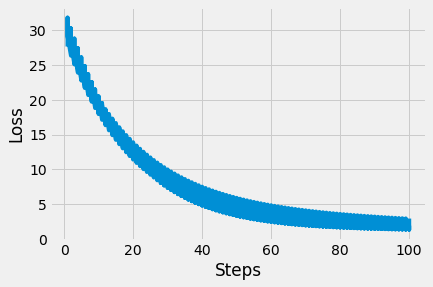

In [42]:
#model9
clf8 = LinearRegression()
clf8.fit(X_train[:, 3], X_train[:, 0])
predict8 = clf8.predict(X_test[:, 3], X_test[:, 0])
print("The Test Loss:",predict8)

Step no:  1
batch_size: 32
LOSS IS : 5.8033375000000005
Step no:  1
batch_size: 32
LOSS IS : 4.385168074508538
Step no:  1
batch_size: 32
LOSS IS : 5.182860736903564
Step no:  1
batch_size: 32
LOSS IS : 4.483431885744596
Step no:  1
batch_size: 32
LOSS IS : 5.976474756371304
Step no:  2
batch_size: 32
LOSS IS : 4.8584542100507475
Step no:  2
batch_size: 32
LOSS IS : 3.4385819747471293
Step no:  2
batch_size: 32
LOSS IS : 4.322197555536478
Step no:  2
batch_size: 32
LOSS IS : 3.65966184520056
Step no:  2
batch_size: 32
LOSS IS : 5.2155757348285245
Step no:  3
batch_size: 32
LOSS IS : 4.17879885090184
Step no:  3
batch_size: 32
LOSS IS : 2.785363337625041
Step no:  3
batch_size: 32
LOSS IS : 3.7185056957092457
Step no:  3
batch_size: 32
LOSS IS : 3.088829870337136
Step no:  3
batch_size: 32
LOSS IS : 4.6630771658193435
Step no:  4
batch_size: 32
LOSS IS : 3.6877179206467976
Step no:  4
batch_size: 32
LOSS IS : 2.3361416086130493
Step no:  4
batch_size: 32
LOSS IS : 3.2947918705576793
Ste

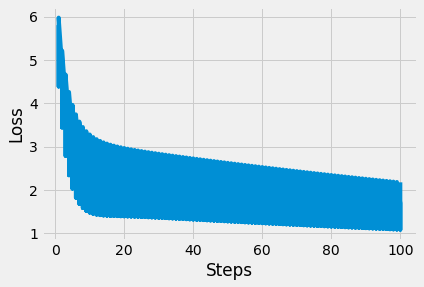

In [43]:
#model10
clf9 = LinearRegression()
clf9.fit(X_train[:, 2], X_train[:, 1])
predict9 = clf9.predict(X_test[:, 2], X_test[:, 1])
print("The Test Loss:",predict9)

Step no:  1
batch_size: 32
LOSS IS : 7.9392
Step no:  1
batch_size: 32
LOSS IS : 6.9349022460904415
Step no:  1
batch_size: 32
LOSS IS : 7.770025671908031
Step no:  1
batch_size: 32
LOSS IS : 7.350631119147129
Step no:  1
batch_size: 32
LOSS IS : 8.937375129516315
Step no:  2
batch_size: 32
LOSS IS : 7.636863637148766
Step no:  2
batch_size: 32
LOSS IS : 6.615972091031029
Step no:  2
batch_size: 32
LOSS IS : 7.455474212287712
Step no:  2
batch_size: 32
LOSS IS : 7.033731440521832
Step no:  2
batch_size: 32
LOSS IS : 8.647944034915081
Step no:  3
batch_size: 32
LOSS IS : 7.349571619677041
Step no:  3
batch_size: 32
LOSS IS : 6.3140795490209305
Step no:  3
batch_size: 32
LOSS IS : 7.157312558729879
Step no:  3
batch_size: 32
LOSS IS : 6.733532355448878
Step no:  3
batch_size: 32
LOSS IS : 8.37165575478231
Step no:  4
batch_size: 32
LOSS IS : 7.0765512013848255
Step no:  4
batch_size: 32
LOSS IS : 6.028319612820059
Step no:  4
batch_size: 32
LOSS IS : 6.8746751954835545
Step no:  4
batch_

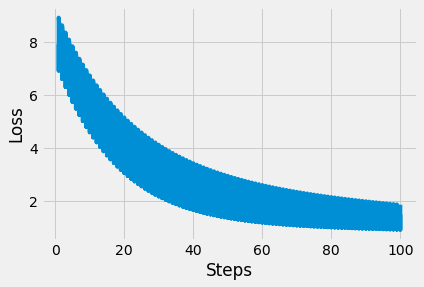

In [44]:
#model11
clf10 = LinearRegression()
clf10.fit(X_train[:, 3], X_train[:, 1])
predict10 = clf10.predict(X_test[:, 3], X_test[:, 1])
print("The Test Loss:",predict10)

Step no:  1
batch_size: 32
LOSS IS : 11.4901375
Step no:  1
batch_size: 32
LOSS IS : 15.285664430871236
Step no:  1
batch_size: 32
LOSS IS : 13.765389309589104
Step no:  1
batch_size: 32
LOSS IS : 14.93217844277747
Step no:  1
batch_size: 32
LOSS IS : 11.71542970304611
Step no:  2
batch_size: 32
LOSS IS : 10.875451479480322
Step no:  2
batch_size: 32
LOSS IS : 14.500738807953667
Step no:  2
batch_size: 32
LOSS IS : 13.038417954164714
Step no:  2
batch_size: 32
LOSS IS : 14.169191764061539
Step no:  2
batch_size: 32
LOSS IS : 11.165120558045103
Step no:  3
batch_size: 32
LOSS IS : 10.293488437245818
Step no:  3
batch_size: 32
LOSS IS : 13.756637594498084
Step no:  3
batch_size: 32
LOSS IS : 12.349824461115064
Step no:  3
batch_size: 32
LOSS IS : 13.445925746783342
Step no:  3
batch_size: 32
LOSS IS : 10.642320921558781
Step no:  4
batch_size: 32
LOSS IS : 9.742524868839183
Step no:  4
batch_size: 32
LOSS IS : 13.051236002306506
Step no:  4
batch_size: 32
LOSS IS : 11.697596447265393
Ste

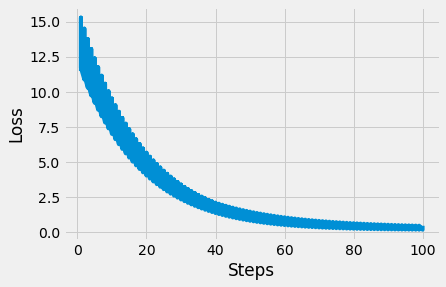

In [45]:
#model12
clf11 = LinearRegression()
clf11.fit(X_train[:, 3], X_train[:, 2])
predict11 = clf11.predict(X_test[:, 3], X_test[:, 2])
print("The Test Loss:",predict11)

# L2 Regularization

In [64]:
class l2Regularization:
    def __init__(self, learning_rate=0.001, iterations=100):
        self.learning_rate, self.iterations = learning_rate, iterations
        self.w = 0.2
        self.b = 0.1
    
    def fit(self, X, y):
        self.w = 0.2
        self.b = 0.1
        n = X.shape[0]
        batch_size = 32
        steps = []
        loss =[]
        for _ in range(self.iterations):
            for i in range(0,len(X)+1, batch_size):
                end = i+batch_size
                x_batch = X[i:end]
                y_batch = y[i:end]
                #prediction
                y_pred = (self.w*x_batch) + self.b 
                #calculating the current cost
                c_loss = np.sum((y_batch-y_pred)**2)+self.w*self.w+self.b*self.b/len(y_batch)
                loss.append(c_loss)
                steps.append(_+1)
                #calculating Gradient
                w_gradient = -2 * np.sum(x_batch*(y_batch - (self.w*x_batch + self.b))+2*self.w) / len(x_batch)
                b_gradient = -2 * np.sum(y_batch - (self.w*x_batch + self.b)+2*self.b) / len(x_batch)
                #update weight and bias
                self.w = self.w - (self.learning_rate * w_gradient)
                self.b = self.b - (self.learning_rate * b_gradient)
                #print("Step no: " , _+1)
                print("batch_size:" , batch_size)
                print("LOSS IS :" , c_loss)
                #print("weight:",w)
                #print("Bias:",b )
        #self.w, self.b = w, b
        plt.plot(steps, loss)
        plt.ylabel("Loss")
        plt.xlabel("Steps")
        
    def predict(self,x,y):
        y_pred = x*self.w + self.b
        y_test = y

        return np.sum((y_test-y_pred)**2)/len(y_test)

batch_size: 32
LOSS IS : 119.55591249999999
batch_size: 32
LOSS IS : 84.32747939820302
batch_size: 32
LOSS IS : 89.21513774064904
batch_size: 32
LOSS IS : 69.62983065950864
batch_size: 32
LOSS IS : 18.71685090683572
batch_size: 32
LOSS IS : 64.68433437554997
batch_size: 32
LOSS IS : 40.74744608245496
batch_size: 32
LOSS IS : 47.35835282420286
batch_size: 32
LOSS IS : 35.89013375327745
batch_size: 32
LOSS IS : 10.817225709222033
batch_size: 32
LOSS IS : 37.539736968395076
batch_size: 32
LOSS IS : 21.525787069504908
batch_size: 32
LOSS IS : 27.65097240258544
batch_size: 32
LOSS IS : 21.240942758896395
batch_size: 32
LOSS IS : 6.798931289082542
batch_size: 32
LOSS IS : 24.193961612970753
batch_size: 32
LOSS IS : 13.753590350379527
batch_size: 32
LOSS IS : 18.678053795501146
batch_size: 32
LOSS IS : 15.503675753943844
batch_size: 32
LOSS IS : 4.743719979706013
batch_size: 32
LOSS IS : 17.691287441662
batch_size: 32
LOSS IS : 11.178962908875999
batch_size: 32
LOSS IS : 14.822574738809285
ba

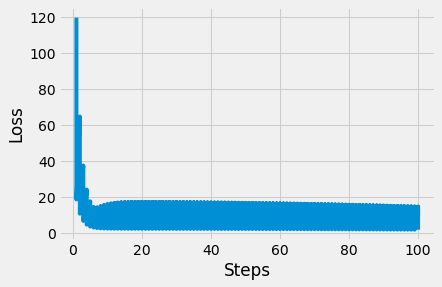

In [65]:
#model12
clf12 = l2Regularization()
clf12.fit(X_train[:, 0], X_train[:, 1])
predict12 = clf12.predict(X_test[:, 0], X_test[:, 1])
print("The Test Loss:",predict12)